In [ ]:
import torch
import utils
import networks
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from torch import nn
from torchvision import datasets, transforms

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
NOISE_SIZE = 64
BATCH_SIZE = 64
LATENT_DIM = 64
EPOCHS = 50
%matplotlib inline

In [ ]:
# Train an IMLE generator
dataloader, _ = utils.get_glomnist_dataloader(BATCH_SIZE)
G = networks.Generator().to(device)
optimizer = torch.optim.Adam(G.parameters(), 1e-3, (0.5, 0.999))

for e in range(EPOCHS):
    G.train()
    for (x, _) in dataloader:
        x = x.to(device)
        z = torch.randn(NOISE_SIZE, LATENT_DIM).to(device)
        out = G(z)
        out_nearest = utils.find_nearest_neighbor(x, out)
        loss = F.mse_loss(out_nearest, x)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(e, loss.item())
    G.eval()
    with torch.no_grad():
        z = torch.randn(64, LATENT_DIM).to(device)
        out = G(z)
        torchvision.utils.save_image(out*0.5+0.5, 'imles/{}.jpg'.format(e))

torch.save(G.state_dict(), 'imle_G.pth')

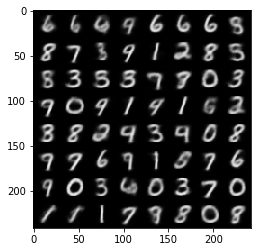

In [4]:
# Random sample
G = networks.Generator().to(device)
G.load_state_dict(torch.load('imle_G.pth'))
G.eval()
with torch.no_grad():
    z = torch.randn(64, LATENT_DIM).to(device)
    out = G(z)
    out = (out * 0.5 + 0.5).cpu()
    out = torchvision.utils.make_grid(out).numpy()

    plt.imshow(out.transpose(1, 2, 0))
    plt.show()